# Recipe Challenge
**Problem Statement**
* **Build model that can guess the ratings for each recipe using given data.**

##### About Data.

| <h3>Column Name<h3/>   | <h3>Description</h3> |
|--------------------|---------------------------------------------------------------------|
| **RecipeNumber**       | Placement of the recipe on the top 100 recipes list                |
| **RecipeCode**         | Unique ID of the recipe used by the site                            |
| **RecipeName**         | Name of the recipe the comment was posted on                        |
| **CommentID**          | Unique ID of the comment                                            |
| **UserID**             | Unique ID of the user who left the comment                          |
| **UserName**           | Name of the user                                                    |
| **UserReputation**     | Internal score of the site, roughly quantifying the past behavior   |
| **CreationTimestamp**  | Time at which the comment was posted as a Unix timestamp            |
| **ReplyCount**         | Number of replies to the comment                                    |
| **ThumbsUpCount**      | Number of up-votes the comment has received                         |
| **ThumbsDownCount**    | Number of down-votes the comment has received                       |
| **Rating**             | The score on a 1 to 5 scale that the user gave to the recipe (Target Variable) |
| **BestScore**          | Score of the comment, likely used by the site to help determine the order comments appear in |
| **Recipe_Review**      | Text content of the comment                                         |



 <h5>Label Rating</h5>

# Exploratory Data Analysis

#### Importing modules and Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import regex
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.svm import SVC
sns.set_style("whitegrid")


for dirname, _, filenames in os.walk('/kaggle/input') : 
    for filename in filenames : 
        print(os.path.join(dirname, filename))
        
        
        

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


In [2]:
data = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


Only **Recipe_Review** has **null values** rest data do not have any null values. Good News!!!.

<div style="text-align: center;">
    <h2 style="margin:auto">Feature Wise Analysis</h2>
</div>


### Rating (Label Feature)

In [49]:
rating_counts = data['Rating'].value_counts()
styled_rating_counts = rating_counts.to_frame().T.style.background_gradient(cmap='Blues', axis=1)\
                         .set_caption('Rating Distribution').set_properties(**{'text-align': 'center'})
styled_rating_counts

Rating,5,0,4,3,1,2
count,10371,1272,1241,368,210,174


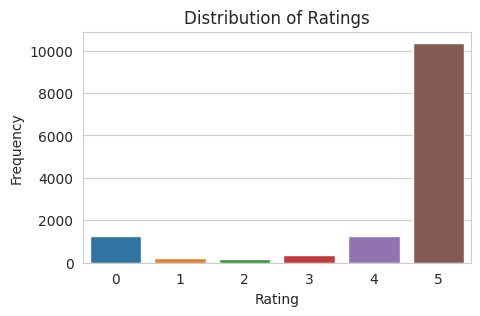

In [50]:
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x="Rating")
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

- Data is highly **Imbalanced.**
- **76%** times recipes have a **rating** of **5**.


### UserReputation

In [51]:
data['UserReputation'].describe().to_frame().T.style.background_gradient(cmap='Blues', axis=1)\
                         .set_caption('Rating Distribution').set_properties(**{'text-align': 'center'})

,count,mean,std,min,25%,50%,75%,max
UserReputation,13636.000000,2.160311,10.086424,0.000000,1.000000,1.000000,1.000000,510.000000


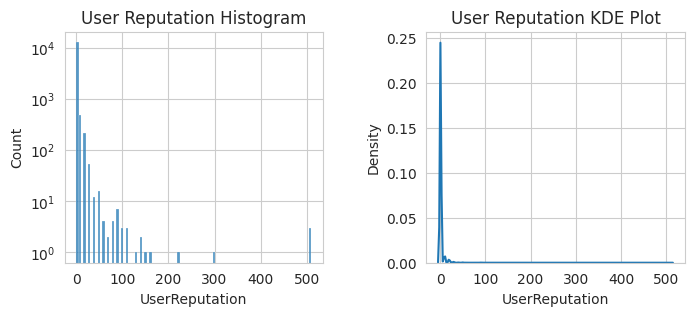

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
plt.subplots_adjust(wspace=0.4)  #  the horizontal space here

# Plot histogram
sns.histplot(data=data, x='UserReputation', bins=100, ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_title('User Reputation Histogram')  #  title to the first subplot

# Plot KDE
sns.kdeplot(data=data, x='UserReputation', ax=ax[1])
ax[1].set_title('User Reputation KDE Plot')  #  title to the second subplot

plt.show()

In [53]:
data['UserReputation_bins'] = pd.cut( data['UserReputation'] , bins=[-np.inf,20,40,80,100,np.inf] , labels= [1,2,3,4,6] , right=True ).astype(np.int64)
data['UserReputation_bins'].value_counts().to_frame().T                                                                                                

UserReputation_bins,1,2,3,6,4
count,13521,66,26,13,10


(0.0, 5.0)

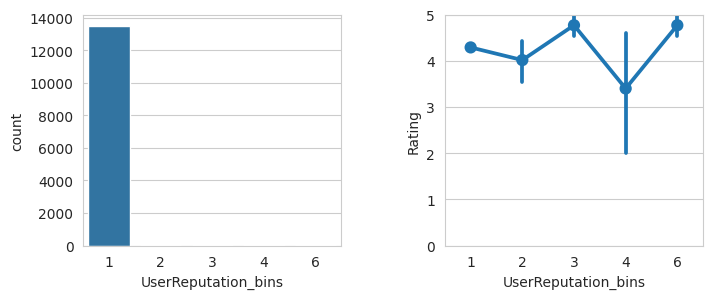

In [54]:
fig, ax = plt.subplots( 1, 2, figsize=(8,3) )
plt.subplots_adjust(wspace=0.4)
sns.countplot( data=data , x='UserReputation_bins', ax=ax[0] )
sns.pointplot( data=data, x = 'UserReputation_bins', y = 'Rating', estimator=np.mean , ax=ax[1] )
ax[1].set_ylim( bottom=0 )
ax[1].set_ylim( top=5 )

* **There is not much correlation in this feature.**

### BestScore

In [55]:
data['BestScore'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
BestScore,13636.0,153.127897,140.986908,0.0,100.0,100.0,100.0,946.0


In [56]:
data['BestScore'].value_counts().to_frame().T

BestScore,100,193,253,142,297,235,329,354,127,374,...,34,491,125,860,582,908,529,119,226,754
count,10506,1074,292,147,124,70,63,44,42,23,...,1,1,1,1,1,1,1,1,1,1


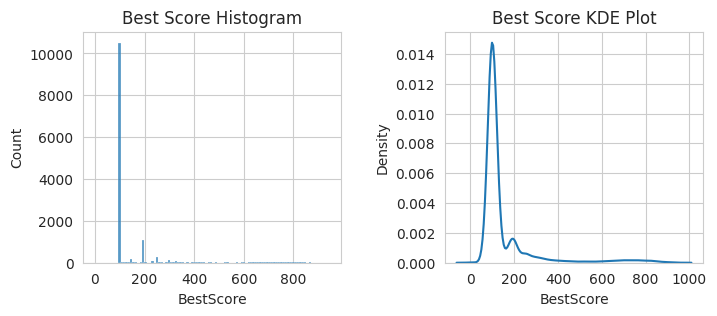

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
plt.subplots_adjust(wspace=0.4)  # Adjust the horizontal space here

# Plot histogram
sns.histplot(data=data, x='BestScore', bins=100, ax=ax[0])
ax[0].set_title('Best Score Histogram')  # Add title to the first subplot

# Plot KDE
sns.kdeplot(data=data, x='BestScore', ax=ax[1])
ax[1].set_title('Best Score KDE Plot')  # Add title to the second subplot

plt.show()

In [62]:
data['BestScore_bins'] = pd.cut( data['BestScore'] , bins=[-1,100,200,400,1000] , labels= [1,2,3,4] , right=True ).astype(np.int64)
data['BestScore_bins'].value_counts().to_frame().T

BestScore_bins,1,2,3,4
count,10519,1436,903,778


In [63]:
data['BestScore_bins'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13636 entries, 0 to 13635
Series name: BestScore_bins
Non-Null Count  Dtype
--------------  -----
13636 non-null  int64
dtypes: int64(1)
memory usage: 106.7 KB


(0.0, 5.0)

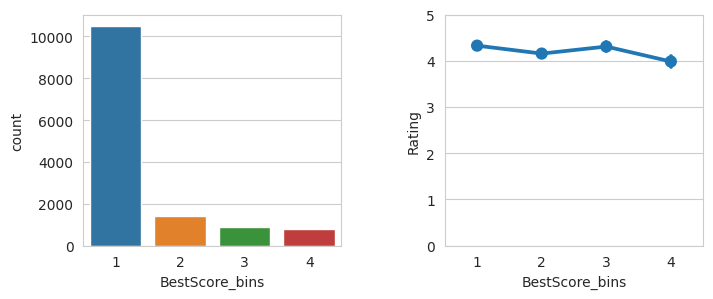

In [64]:
fig, ax = plt.subplots( 1, 2, figsize=(8,3) )
plt.subplots_adjust(wspace=0.4)
sns.countplot( data=data , x='BestScore_bins', ax=ax[0] )
sns.pointplot( data=data, x = 'BestScore_bins', y = 'Rating', estimator=np.mean , ax=ax[1] )
ax[1].set_ylim( bottom=0 )
ax[1].set_ylim( top=5 )

* **Not Much variance here**

### RecipeNumber

In [65]:
data['RecipeNumber'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
RecipeNumber,13636.0,38.624377,29.672351,1.0,12.0,33.0,63.0,100.0


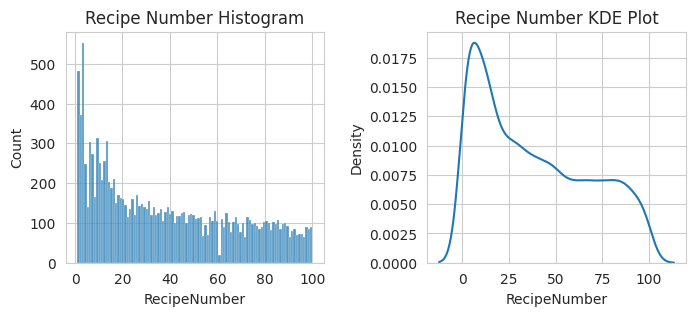

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
sns.histplot(data=data, x='RecipeNumber', bins=100, ax=ax[0])
ax[0].set_title('Recipe Number Histogram')  # Add title to the first subplot
plt.subplots_adjust(wspace=0.4)  # Adjust the horizontal space here
# Plot KDE
sns.kdeplot(data=data, x='RecipeNumber', ax=ax[1])
ax[1].set_title('Recipe Number KDE Plot')  # Add title to the second subplot
plt.show()

In [67]:
data['RecipeNumber_bins'] = pd.cut(x = data['RecipeNumber'] , bins=[0,10,20,30,40,50,60,70,80,90,100], labels=[0,1,2,3,4,5,6,7,8,9] ).astype(np.int64)

In [68]:
data['RecipeNumber_bins'].value_counts().to_frame().T

RecipeNumber_bins,0,1,2,3,4,5,8,7,6,9
count,3103,2018,1411,1287,1180,1023,973,955,915,771


In [69]:
data['RecipeNumber_bins'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13636 entries, 0 to 13635
Series name: RecipeNumber_bins
Non-Null Count  Dtype
--------------  -----
13636 non-null  int64
dtypes: int64(1)
memory usage: 106.7 KB


In [70]:
pd.crosstab( [data.RecipeNumber_bins],[data.Rating],margins=True ).style.background_gradient( cmap='summer_r' )

Rating,0,1,2,3,4,5,All
RecipeNumber_bins,,,,,,,
0,199,36,34,71,253,2510,3103
1,233,25,19,46,161,1534,2018
2,154,22,20,42,115,1058,1411
3,117,22,12,26,92,1018,1287
4,118,21,14,26,118,883,1180
5,85,28,15,34,83,778,1023
6,102,16,11,30,127,629,915
7,106,9,20,30,93,697,955
8,97,14,14,32,118,698,973


[]

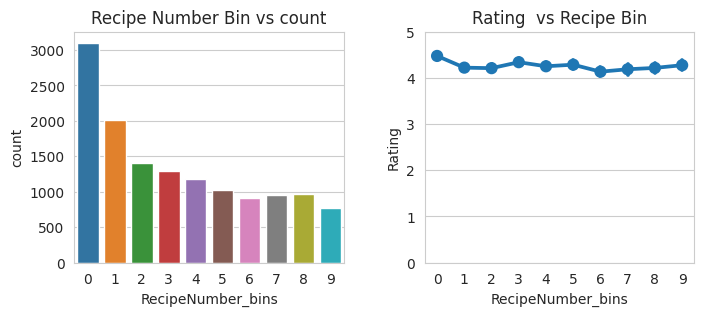

In [71]:
fig, ax = plt.subplots( 1, 2, figsize=(8,3) )
plt.subplots_adjust(wspace=0.3)
sns.countplot( data=data , x='RecipeNumber_bins', ax=ax[0] )
sns.pointplot( data=data, x = 'RecipeNumber_bins', y = 'Rating', estimator=np.mean , ax=ax[1] )
ax[0].set_title('Recipe Number Bin vs count')
ax[1].set_title('Rating  vs Recipe Bin')
ax[1].set_ylim( bottom=0 )
ax[1].set_ylim( top=5 )
plt.plot()

### ReplyCount

In [72]:
data['ReplyCount'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
ReplyCount,13636.0,0.01452,0.137323,0.0,0.0,0.0,0.0,3.0


In [73]:
data['ReplyCount'].value_counts().to_frame().T

ReplyCount,0,1,2,3
count,13464,151,16,5


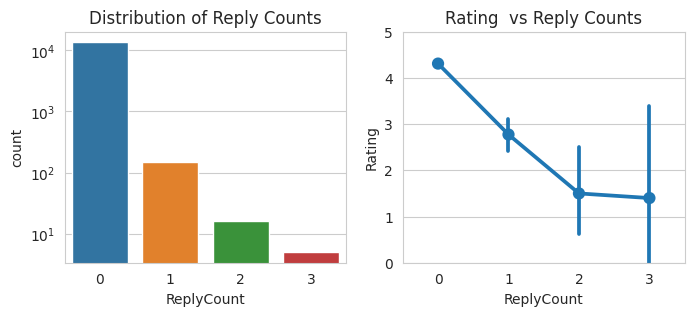

In [74]:
fig, ax = plt.subplots( 1, 2, figsize=(8, 3) )
sns.countplot( data=data, x='ReplyCount', ax=ax[0] )
ax[0].set_yscale('log')  # Set y-axis scale to logarithmic
sns.pointplot( data=data, x = 'ReplyCount', y = 'Rating', estimator=np.mean , ax=ax[1] )
ax[0].set_title('Distribution of Reply Counts')
ax[1].set_title('Rating  vs Reply Counts')
ax[1].set_ylim( bottom=0 )
ax[1].set_ylim( top=5 )
plt.show()

**Insight**
* Feature has **negative trend** with rating although there is **high variance feature** might be important.

### ThumbsUpCount

In [75]:
data['ThumbsUpCount'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
ThumbsUpCount,13636.0,1.098269,4.166487,0.0,0.0,0.0,0.0,80.0


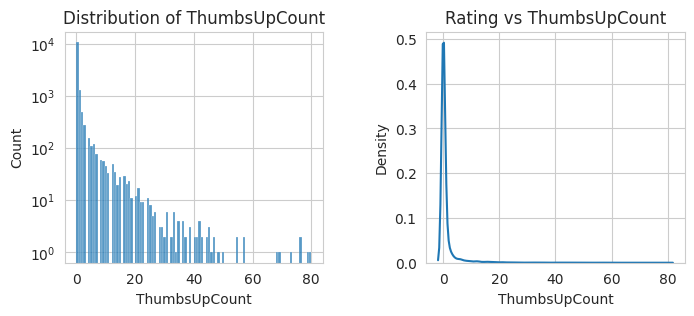

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
plt.subplots_adjust(wspace=0.4) 
sns.histplot(data=data, x='ThumbsUpCount', bins=100, ax=ax[0])
ax[0].set_yscale('log')  # Set y-axis scale to logarithmic
sns.kdeplot(data=data, x='ThumbsUpCount', ax=ax[1])
ax[0].set_title('Distribution of ThumbsUpCount')  # Add title to the first subplot
ax[1].set_title('Rating vs ThumbsUpCount')  # Add title to the second subplot
plt.show()


In [77]:
data['ThumbsUpCount_bins'] = pd.cut( x = data['ThumbsUpCount'] , bins=[-np.inf,5,10,20,50,np.inf], labels=[0,1,2,3,4]  ,right=True, include_lowest=True ).astype(np.int64)

In [78]:
data['ThumbsUpCount_bins'].value_counts().to_frame().T

ThumbsUpCount_bins,0,1,2,3,4
count,12894,352,258,121,11


[]

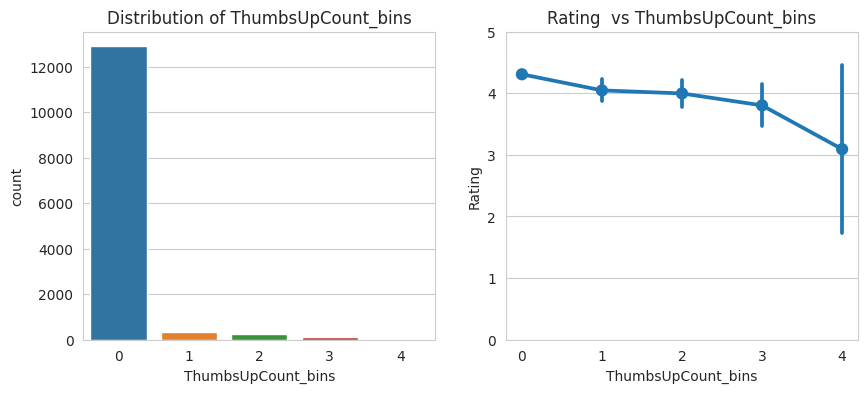

In [79]:
fig, ax = plt.subplots( 1, 2, figsize=(10,4) )
sns.countplot( data=data , x='ThumbsUpCount_bins', ax=ax[0] )
sns.pointplot( data=data, x = 'ThumbsUpCount_bins', y = 'Rating', estimator=np.mean , ax=ax[1] )
ax[0].set_title('Distribution of ThumbsUpCount_bins')
ax[1].set_title('Rating  vs ThumbsUpCount_bins')
ax[1].set_ylim( bottom=0 )
ax[1].set_ylim( top=5 )
plt.plot()

* **Insights**
* There is little **downward trend** in this feature also another **important feature**.
* Highly skewed feature.

### ThumbsDownCount

In [80]:
data['ThumbsDownCount'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
ThumbsDownCount,13636.0,0.543708,3.26566,0.0,0.0,0.0,0.0,126.0


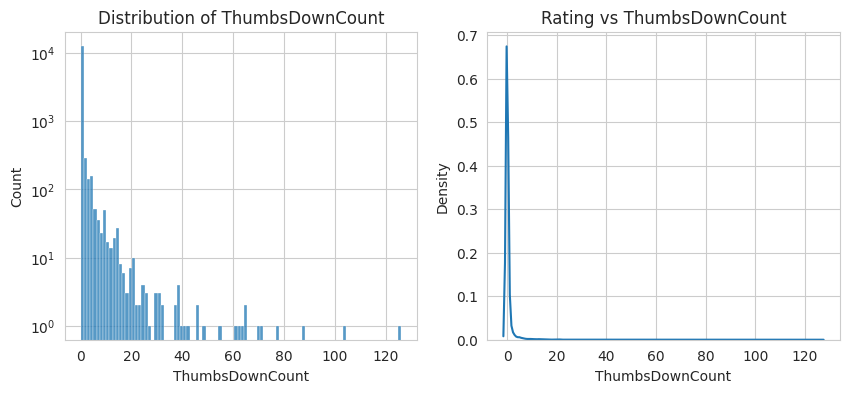

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(data=data, x='ThumbsDownCount', bins=100, ax=ax[0])
ax[0].set_yscale('log')  # Set y-axis scale to logarithmic
sns.kdeplot(data=data, x='ThumbsDownCount', ax=ax[1])
ax[0].set_title('Distribution of ThumbsDownCount')  # Add title to the first subplot
ax[1].set_title('Rating vs ThumbsDownCount')  # Add title to the second subplot
plt.show()


In [82]:
data['ThumbsDownCount_bins'] = pd.cut(x = data['ThumbsDownCount'] , bins=[-np.inf,5,10,20,50,np.inf], labels=[0,1,2,3,4] , include_lowest=True, right=True).astype(np.int64)

In [83]:
data['ThumbsDownCount_bins'].value_counts().to_frame().T

ThumbsDownCount_bins,0,1,2,3,4
count,13321,160,101,42,12


[]

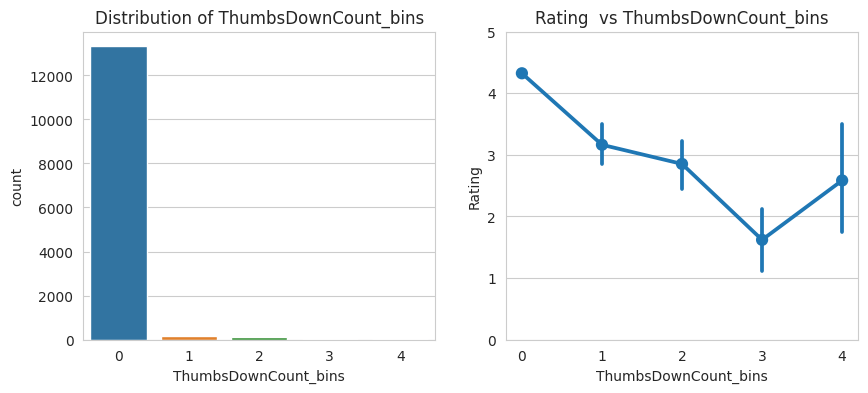

In [84]:
fig, ax = plt.subplots( 1, 2, figsize=(10,4) )
sns.countplot( data=data , x='ThumbsDownCount_bins', ax=ax[0] )
sns.pointplot( data=data, x = 'ThumbsDownCount_bins', y = 'Rating', estimator=np.mean , ax=ax[1] )
ax[0].set_title('Distribution of ThumbsDownCount_bins')
ax[1].set_title('Rating  vs ThumbsDownCount_bins')
ax[1].set_ylim( bottom=0 )
ax[1].set_ylim( top=5 )
plt.plot()

**Insights**:
* **Again there is some variability in the rating as ThumpsDownCount_bins increases which suggest that this feature might be important for the model.**

### Reaction Feature Artificial

In [85]:
data.loc[:,'reaction'] = data.loc[: ,'ThumbsUpCount'] + 3*data.loc[ : , 'ReplyCount' ] + data.loc[ : ,'ThumbsDownCount' ]

In [86]:
data['reaction'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
reaction,13636.0,1.685538,6.35807,0.0,0.0,0.0,1.0,142.0


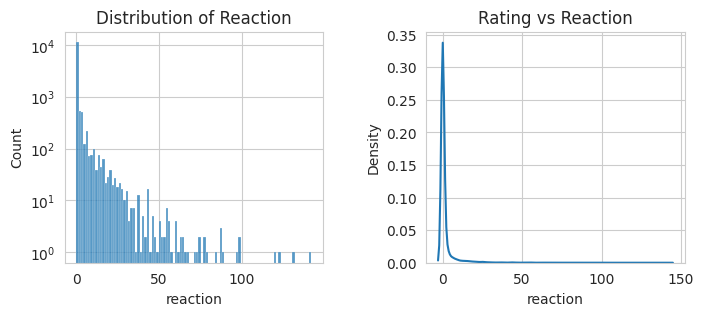

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
plt.subplots_adjust(wspace=0.4)
sns.histplot(data=data, x='reaction', bins=100, ax=ax[0])
ax[0].set_yscale('log')  # Set y-axis scale to logarithmic
sns.kdeplot(data=data, x='reaction', ax=ax[1])
ax[0].set_title('Distribution of Reaction')  # Add title to the first subplot
ax[1].set_title('Rating vs Reaction')  # Add title to the second subplot
plt.show()

In [88]:
data['reaction_bin'] = pd.cut(x = data['reaction'] , bins=[0,5,10,20,50,100,200], labels=[0,1,2,3,4,5] , include_lowest=True, right=True).astype(np.int64)

In [89]:
data['reaction_bin'].value_counts().to_frame().T

reaction_bin,0,1,2,3,4,5
count,12614,419,337,219,43,4


[]

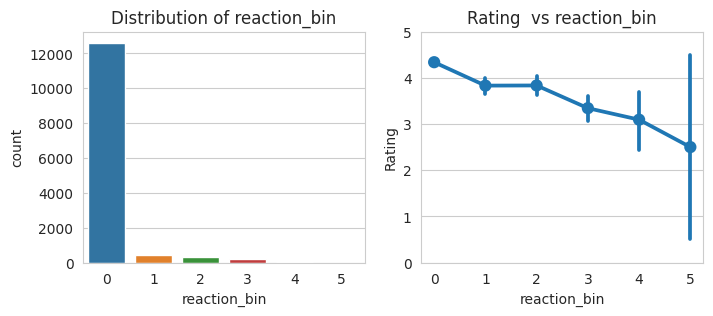

In [90]:
fig, ax = plt.subplots( 1, 2, figsize=(8,3) )
sns.countplot( data=data , x='reaction_bin', ax=ax[0] )
sns.pointplot( data=data, x = 'reaction_bin', y = 'Rating', estimator=np.mean , ax=ax[1] )
ax[0].set_title('Distribution of reaction_bin')
ax[1].set_title('Rating  vs reaction_bin')
ax[1].set_ylim( bottom=0 )
ax[1].set_ylim( top=5 )
plt.plot()

* **Insights**
* **Reaction bin has negative trend also an important feature**

<Axes: >

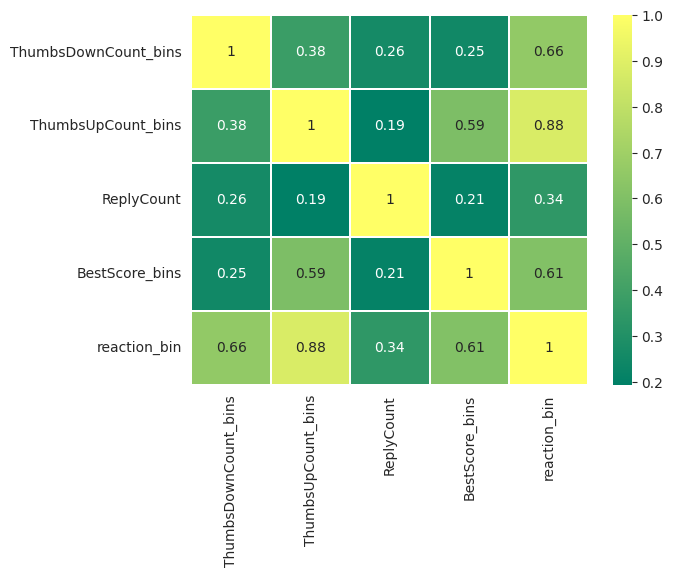

In [91]:
sns.heatmap(data = data[['ThumbsDownCount_bins' ,'ThumbsUpCount_bins' ,'ReplyCount' , 'BestScore_bins'  , 'reaction_bin']].corr(), annot = True,linewidths=1.1,cmap='summer')

* **Insights**
* **Company seems to be using thumps as scoring review to some factor.**
* **Reaction bin and ThumpsupCount have high correlation feature engineering will handel this.**

### CreationTimestamp

In [92]:
data['CreationTimestamp'] = pd.to_datetime( data['CreationTimestamp'], unit='s' )

In [93]:
data['CreationTimestamp']

0       2021-06-03 10:44:38
1       2021-06-03 10:57:32
2       2021-06-03 10:49:17
3       2021-06-02 15:48:19
4       2021-06-03 11:04:20
                ...        
13631   2021-06-03 10:42:49
13632   2021-06-03 10:48:49
13633   2021-06-03 11:01:29
13634   2021-06-03 10:46:32
13635   2021-06-03 10:55:03
Name: CreationTimestamp, Length: 13636, dtype: datetime64[ns]

### Year

[]

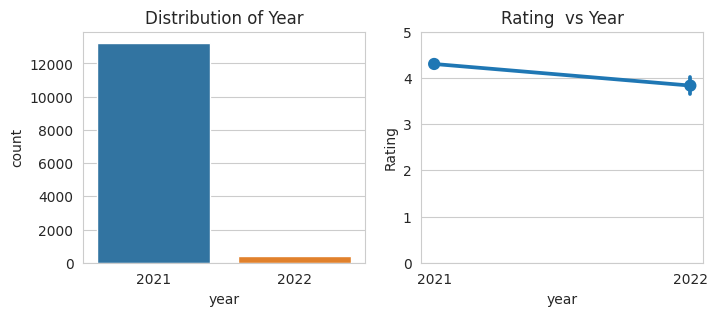

In [94]:
data['year'] = data['CreationTimestamp'].dt.year
# sns.countplot(data, x="year")
fig, ax = plt.subplots( 1, 2, figsize=(8,3) )
sns.countplot( data=data , x='year', ax=ax[0] )
sns.pointplot( data=data, x = 'year', y = 'Rating', estimator=np.mean , ax=ax[1] )
ax[1].set_ylim( bottom=0 )
ax[0].set_title('Distribution of Year')
ax[1].set_title('Rating  vs Year')
ax[1].set_ylim( top=5 )
plt.plot()

* **No trend**.

### Month

[]

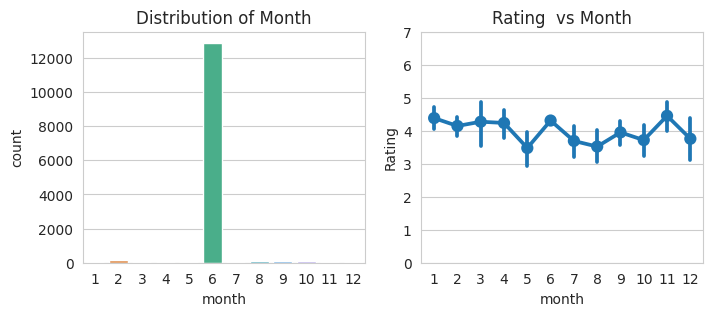

In [95]:
data['month'] = data['CreationTimestamp'].dt.month
# sns.countplot(data, x="year")
fig, ax = plt.subplots( 1, 2, figsize=(8,3) )
sns.countplot( data=data , x='month', ax=ax[0] )
sns.pointplot( data=data, x = 'month', y = 'Rating', estimator=np.mean , ax=ax[1] )
ax[0].set_title('Distribution of Month')
ax[1].set_title('Rating  vs Month')
ax[1].set_ylim( bottom=0 )
ax[1].set_ylim( top=7 )
plt.plot()

**Insights**
* No trend and also no variation in the feature.
* Mostly only june Month data was available.

### Hour

[]

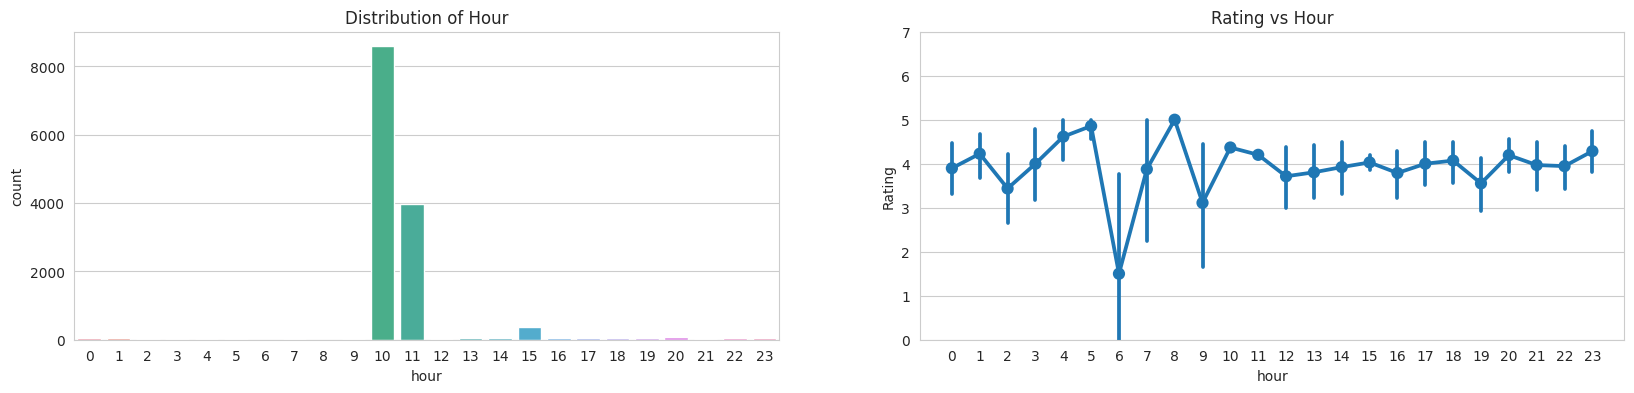

In [96]:
data['hour'] = data['CreationTimestamp'].dt.hour
fig, ax = plt.subplots( 1, 2, figsize=(20,4) )
sns.countplot( data=data , x='hour', ax=ax[0] )
sns.pointplot( data=data, x = 'hour', y = 'Rating', estimator=np.mean , ax=ax[1] )
ax[0].set_title('Distribution of Hour')
ax[1].set_title('Rating vs Hour')
ax[1].set_ylim( bottom=0 )
ax[1].set_ylim( top=7 )
plt.plot()

**Insights**
* **Mostly people gave reivew only in three hour.**
* **There is also no trend.**

### day


In [97]:
def fun(x): ## function for converting hours to day time like morning, afternoon, night etc.
    if x < 8 :
        return 'morning'
    elif x < 16 :
        return 'After Noon'
    else :
        return 'Night'
data['day'] = data['CreationTimestamp'].dt.hour.apply(fun)

In [98]:
data['day'].value_counts().to_frame().T 

day,After Noon,Night,morning
count,13054,412,170


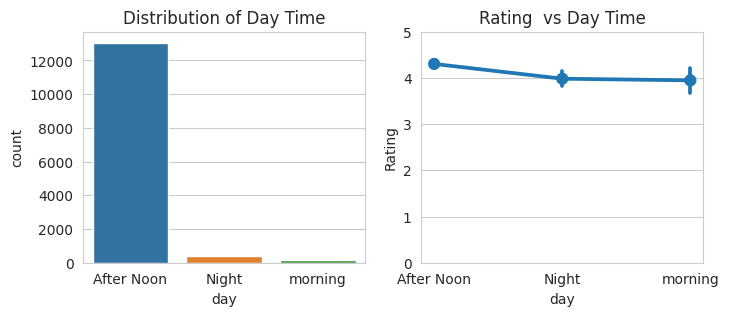

In [99]:
fig, ax = plt.subplots( 1, 2, figsize=(8,3) )
sns.countplot( data=data , x='day', ax=ax[0] )
sns.pointplot( data=data, x = 'day', y = 'Rating', estimator=np.mean , ax=ax[1] )
ax[0].set_title('Distribution of Day Time')
ax[1].set_title('Rating  vs Day Time')
ax[1].set_ylim( bottom=0 )
ax[1].set_ylim( top=5 )
plt.plot()
print()

[]

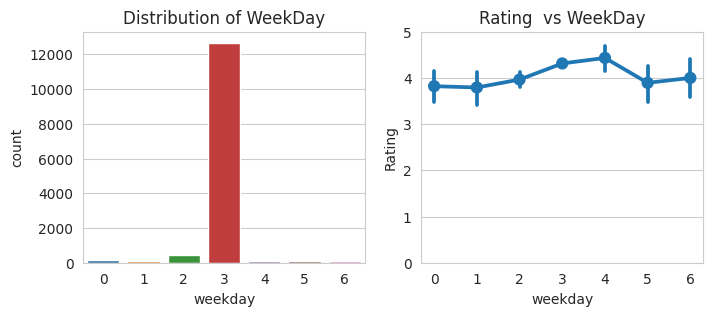

In [100]:
data['weekday'] = data['CreationTimestamp'].dt.weekday
fig, ax = plt.subplots( 1, 2, figsize=(8,3) )
sns.countplot( data=data , x='weekday', ax=ax[0] )
sns.pointplot( data=data, x = 'weekday', y = 'Rating', estimator=np.mean , ax=ax[1] )
ax[0].set_title( 'Distribution of WeekDay' )
ax[1].set_title( 'Rating  vs WeekDay' )
ax[1].set_ylim( bottom=0 )
ax[1].set_ylim( top=5 )
plt.plot()

**Insights**:
* **Highly Imbalance data, cannot draw any conclusion.**

## Preprocessing & Feature Selection

**Garbage Features**
*  **ID** : Id does not contribute anyhow to label vector.
* **RecipeNumber** : RecipeNumber no do not have any significance in real world.
* **RecipeCode** : RecipeCode number do not have any significance in real world.
* **RecipeName** : RecipeName number do not have any significance in real world
* **CommentID**  : CommentID number do not have any significance in real world.
* **UserID** : UserID number do not have any significance in real world.
* **UserName** : UserName number do not have any significance in real world. **
* And **others feature** as well except reaction_bin & text recipe name and review.



**Important Features**
* **Recipe_Review** : Review given by users are important for the sentiment analysis as it contains words expressing user sentiment.
* **Recipe Name** : Some Recipe ingredient may have good response from user so they might help us.
* **Reaction**  : Reaction means sum of likes unlike and replies counts on the review might tell us the importance of that review, also there was negative trend in reaction and Rating.
* **ThumpsupCount** : Likes or dislikes is important factor for a review.
* **ThumpsdownCount** : same reason as above.
* **ReplyCount** : numbers of reply has some dependency on the rating, we have seen in EDA.

In [4]:
data = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')
X_test = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')

In [5]:
data.isna().sum().to_frame().rename({0:'Null Values'} , axis='columns')

,Null Values
ID,0
RecipeNumber,0
RecipeCode,0
RecipeName,0
CommentID,0
UserID,0
UserName,0
UserReputation,0
CreationTimestamp,0
ReplyCount,0


Recipe_Review feature has **2 null values**.
Simply remove it.

In [6]:
data = data[data['Recipe_Review'].notna()].copy()

In [7]:
data.isna().sum().to_frame().rename({0:'Null Values'} , axis='columns')

,Null Values
ID,0
RecipeNumber,0
RecipeCode,0
RecipeName,0
CommentID,0
UserID,0
UserName,0
UserReputation,0
CreationTimestamp,0
ReplyCount,0


* **No null values.**

#### Feature Engineering

In [8]:
# Binning for data
data['ThumbsUpCount_bins'] = pd.cut( x = data['ThumbsUpCount'] , bins=[-np.inf,5,10,20,50,np.inf], labels=[0,1,2,3,4]  ,right=True, include_lowest=True ).astype(np.int64)
data['ThumbsDownCount_bins'] = pd.cut( x = data['ThumbsDownCount'] , bins=[-np.inf,5,10,20,50,np.inf], labels=[0,1,2,3,4] , include_lowest=True, right=True).astype(np.int64)





# Binning for test
X_test['ThumbsUpCount_bins'] = pd.cut( x = X_test['ThumbsUpCount'] , bins=[-np.inf,5,10,20,50,np.inf], labels=[0,1,2,3,4]  ,right=True, include_lowest=True )
X_test['ThumbsDownCount_bins'] = pd.cut( x = X_test['ThumbsDownCount'] , bins=[-np.inf,5,10,20,50,np.inf], labels=[0,1,2,3,4] , include_lowest=True, right=True)





# Reaction Feature
data.loc[:,'reaction'] = data.loc[: ,'ThumbsUpCount'] + 3*data.loc[ : , 'ReplyCount' ] + data.loc[ : ,'ThumbsDownCount' ]
X_test.loc[:,'reaction'] = X_test.loc[: ,'ThumbsUpCount'] + 3*X_test.loc[ : , 'ReplyCount' ] + X_test.loc[ : ,'ThumbsDownCount' ]






## Binning over Reaction feature
data['reaction_bin'] = pd.cut(x = data['reaction'] , bins=[-np.inf,5,10,20,50,100,np.inf], labels=[0,1,2,3,4,5] , include_lowest=True, right=True).astype(np.int64)
X_test['reaction_bin'] = pd.cut(x = X_test['reaction'] , bins=[-np.inf,5,10,20,50,100,np.inf], labels=[0,1,2,3,4,5] , include_lowest=True, right=True).astype(np.int64)





## Feature Selection 
X_train = data[[ 'RecipeName','Recipe_Review' , 'reaction_bin' , 'ThumbsUpCount_bins' ,'ThumbsDownCount_bins', 'ReplyCount' ]]
X_test = X_test[[ 'RecipeName','Recipe_Review' , 'reaction_bin' , 'ThumbsUpCount_bins' ,'ThumbsDownCount_bins', 'ReplyCount' ]]


y_train = data['Rating']

In [9]:
X_train.columns

Index(['RecipeName', 'Recipe_Review', 'reaction_bin', 'ThumbsUpCount_bins',
       'ThumbsDownCount_bins', 'ReplyCount'],
      dtype='object')

In [10]:
X_test.columns

Index(['RecipeName', 'Recipe_Review', 'reaction_bin', 'ThumbsUpCount_bins',
       'ThumbsDownCount_bins', 'ReplyCount'],
      dtype='object')

#### Text Cleaning.

In [11]:
html_entities_dict = {
    
    
    '&#34;': '"', '&#38;': '&', '&#39;': "'", '&#60;': '<', '&#62;': '>',
    '&#160;': ' ', '&#169;': '©', '&#174;': '®', '&#8482;': '™', '&#9829;': '♥',
    '&#9825;': '♦', '&#9830;': '♣', '&#9827;': '♠', '&#9679;': '•', '&#8230;': '…',
    '&#8364;': '€', '&#163;': '£', '&#165;': '¥', '&#162;': '¢', '&#8592;': '←',
    '&#8594;': '→', '&#8593;': '↑', '&#8595;': '↓', '&lt;': '<', '&gt;': '>',
    '&amp;': '&', '&quot;': '"', '&apos;': "'", '&cent;': '¢', '&pound;': '£',
    '&yen;': '¥', '&euro;': '€', '&copy;': '©', '&reg;': '®', '&trade;': '™',
    '&times;': '×', '&divide;': '÷', '&alpha;': 'α', '&beta;': 'β', '&gamma;': 'γ',
    '&delta;': 'δ', '&epsilon;': 'ε', '&pi;': 'π', '&sigma;': 'σ', '&theta;': 'θ',
    '&omega;': 'ω', '&mu;': 'μ', '&lambda;': 'λ', '&nbsp;': ' ', '&ensp;': ' ',
    '&emsp;': ' ', '&thinsp;': ' ', '&zwj;': '‍', '&zwnj;': '‌',
    
    
}


emoticons = {
    ':)': 'happy', ':(': 'sad', ':d': 'laughing', ':p': 'playful', ';)': 'Wink',
             ':o': 'surprised', ':|': 'neutral', ':/': 'skeptical', ':*': 'kiss', ':]': 'Joyful',
             ':[': 'Disappointed', ':S': 'Confused', ':$': 'Embarrassed', ':X': 'Silent',
             ':#': 'muted', 'xd': 'laughing', ';d': 'wink', 'b)': 'cool', 'b-)': 'cool',
             '8)': 'cool', '8-)': 'cool', ':-d': 'happy', ':-p': 'playful', ':-/': 'skeptical',
             'O:)': 'Angel', 'O:-)': 'Angel', '>:(': 'Angry', 'D:': 'Shocked', ':-@': 'Angry',
             ':-s': 'confused', ':-|': 'neutral', ':-\\': 'skeptical', ':-#': 'muted', ':@': 'angry',
             ':\\': 'skeptical', ':-)': 'smile', ':-(': 'sad', ';-)': 'wink', ':-o': 'surprised',
             '<3': 'love', ':-*': 'kiss', ':-]': 'joyful', ':-[': 'disappointed', ':-$': 'embarrassed',
             ':-x': 'silent'
}


emoji = {
    
    '😀': ' happy ', '😃': ' happy ', '😄': ' happy ', '😁': ' happy ', '😆': ' happy ', '😅': ' happy ',
    '🤣': ' laughing ', '😂': ' laughing ', '🙂': ' happy ', '🙃': ' happy ', '😉': ' playful ',
    '😊': ' happy ', '😇': ' angelic ', '🥰': ' loving ', '😍': ' loving ', '🤩': ' excited ',
    '😘': ' affectionate ', '😗': ' kissing ', '😚': ' kissing ', '😙': ' kissing ', '😋': ' yummy ',
    '😛': ' playful ', '😜': ' playful ', '🤪': ' playful ', '😝': ' playful ', '🤑': ' money-mouth ',
    '🤗': 'warm', '🤭': 'shy', '🤫': 'secretive', '🤔': 'thinking', '🤐': 'silent',
    '🤨': ' doubtful ', '😐': ' neutral ', '😑': ' expressionless ', '😶': ' speechless ',
    '😏': ' smirking ', '😒': ' unamused ', '🙄': ' exasperated ', '😬': ' grimacing ', '🤥': ' dishonest ',
    '😌': ' relieved ', '😔': ' sad ', '😪': ' sleepy ', '🤤': ' desire ', '😴': ' sleepy ',
    '😷': ' sick ', '🤒': ' sick ', '🤕': ' injured ', '🤢': ' nauseated ', '🤮': ' vomiting ',
    '🤧': ' sneezing ', '🥵': ' hot ', '🥶': ' cold ', '🥴': ' dizzy ', '😵': ' dizzy ',
    '🤯': ' mind-blown ', '🤠': ' cowboy ', '🥳': ' celebratory ', '🥺': ' pleading ',
    '🤦': ' annoyance ', '😎': ' cool ', '😸': ' cheerful ', '🙈': ' shy ', '🙉': ' curious ',
    '🙊': ' mischievous ', '💪': ' strong ', '👍': ' approval ', '👎': ' disapproval ', '✌️': ' peaceful ',
    '🤞': ' hopeful ', '🤟': ' affectionate ' , '🤘': ' rocking ', '🖖': ' salute ' , '👌': ' ok ',
    '👏': ' applause ', '🙌': ' celebration ', '🤲': ' sharing ', '👐': ' openness ', '🤝': ' agreement ',
    '👊': ' fist bump ' , '✊': ' determination ', '🤛': ' respect ', '🤜': ' support ', '👋': ' greeting ',
    '🤚': ' gesture ', '🖐️': ' handshake ', '✋': ' raised hand ', '🤙': ' call me ', '💋': ' kiss ',
    '💌': ' love letter ', '💕': ' affection ', '💞': ' warmth ' , '💖': ' sparkling ', '💘': ' romance ',
    '💓': ' heartfelt ' , '💗': ' emotion ', '💔': ' heartbreak ', '💝': ' gift ', '💟': ' heartfelt ',
    '❤️': ' affection ', '💛': ' admiration ', '💚': ' supportive ','💙': ' tranquil ','💜': ' charming ',
'🖤': 'mystery', '💯': 'perfection', '🔥': 'excitement', '💥': 'explosive', '🌟': 'shiny', '✨': 'sparkling',
    '💫': 'dazzling', '💦': 'refreshment', '💧': 'drop', '💤': 'sleepy', '💨': 'zooming', '🚀': 'launch', 
    '🎉': 'festivity', '🎊': 'party', '🎈': 'joyful', '🎁': 'surprise', '🎂': 'celebration', '🎄': 'festive', 
    '🎃': 'spooky', '🔪': 'cutting', '🍴': 'eating', '🍔': 'tasty', '🍟': 'crunchy', '🍕': 'savory', '🌭': 'hotdog',
    '🍦': 'ice cream', '🍨': 'delicious', '🍩': 'sweet', '🍪': 'cookie', '🍰': 'cake', '🍫': 'chocolaty', '🍬': 'candy',
    '🍭': 'lollipop', '🍺': 'beer', '🍻': 'beer', '🥂': 'cheers', '🍷': 'wine', 
    '🍸': 'martini', '🍹': 'cocktail', '🍾': 'champagne', '🥃': 'drinking', 
    '🍯': 'sweetness', '🍼': 'baby', '🥛': 'milk', '☕': 'coffee', '🍵': 'tea', 
    '🍶': 'sake', '🥤': 'sipping', '☀️': 'sunny', '🌞': 'radiant', '🌝': 'glowing',
    '🌠': 'magical', '🌌': 'cosmic', '🌼': 'sunny', '🌻': 'vibrant', '🌺': 'festive',
    '🌸': 'blossoming', '🌷': 'blooming', '🌹': 'romantic', '🌜': 'mystical', '🌛': 'enigmatic',
    '🌙': 'night', '⭐': 'star', '🌈': 'colorful'
    
}



In [12]:
def lowercase_text(text):
    text = text.lower()
    return text
    
# A function to replace HTML entities in text data
def replace_html_entities(text):
    # Iterate over each HTML entity and its corresponding character in the dictionary
    for entity, char in html_entities_dict.items():
        # Replace the HTML entity with its corresponding character in the text
        text = text.replace(entity, char)
    return text
    
    
def remove_a_tag(text):## removing a tag from the html which carries some urls in it
    return regex.sub(r'<a\b[^>]*>(.*?)</a>', '', text)
    
    
def remove_html_tags(text): ## removing all the html tags
    text = regex.sub( r'<[^>]*>', '' , text)
    return text
    
    
def url_remove(text):  #### Removing urls 
    url_pattern = r'(https:\/\/www\.|http:\/\/www\.|https:\/\/|http:\/\/)?[a-zA-Z]{2,}(\.[a-zA-Z]{2,})(\.[a-zA-Z]{2,})?\/[a-zA-Z0-9]{2,}|((https:\/\/www\.|http:\/\/www\.|https:\/\/|http:\/\/)?[a-zA-Z]{2,}(\.[a-zA-Z]{2,})(\.[a-zA-Z]{2,})?)|(https:\/\/www\.|http:\/\/www\.|https:\/\/|http:\/\/)?[a-zA-Z0-9]{2,}\.[a-zA-Z0-9]{2,}\.[a-zA-Z0-9]{2,}(\.[a-zA-Z0-9]{2,})?'
    email_pattern = r'[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}'
    text = regex.sub( email_pattern, '' , text)
    text = regex.sub( url_pattern, '' , text)
    return text
    
    
def replace_emoticons(text): ### Replacing Emoction like ):,  (:, <3 
    # Iterate over each emoticon and its corresponding emotion in the dictionary
    for emoticon, emotion in emoticons.items():
        # Replace the emoticon with its corresponding emotion in the text
        text = text.replace(emoticon, emotion)
    return text
    
    
def replace_emojis(text): ## Replacing emojis with their meaning 
    for face, feeling in emoji.items():
        text = text.replace(face, feeling)
    return text
    
    
def remove_mmmmmmms(text) : # Replacing mmmmm mmm mmmmmmmmm mmmmmmmmm words with mmm 
    pattern = r'm{3,}'
    text = regex.sub( pattern, 'mmm' , text)
    return text
    
    
def remove_long_same_word(text): ## Replacing words like yummmmmy, yyyyyyyyyyuuuuuuuuummm, soooooooo, with yummmy yyyuuummm sooo
    pattern = r'(\w)\1{2,}'
    return regex.sub(pattern, r'\1\1\1', text)
    
    
def recipe_review(series):
    series =  series.apply(lowercase_text)
    series = series.apply(replace_html_entities)
    series = series.apply(remove_a_tag)
    series = series.apply(remove_html_tags)
    series= series.apply(url_remove)
    series = series.apply(replace_emoticons)
    series = series.apply(replace_emojis)
#     series = series.apply(remove_mmmmmmms)
#     series = series.apply(remove_long_same_word)
    return series
    
    
def recipe_name(series):
    print(type(series))
    series =  series.apply(lowercase_text)
    return series



In [13]:
nametf = TfidfVectorizer( lowercase=True, analyzer='word', ngram_range=(1, 1) , max_df=1.0, min_df=0 , norm='l2',smooth_idf=True )
reviewtf = TfidfVectorizer( lowercase=True, analyzer='word', stop_words='english' , ngram_range=(1, 1) , max_df=1.0, min_df=2 , norm='l2',smooth_idf=True)


# cv1 = CountVectorizer(analyzer='word', ngram_range=(3, 3) ,min_df = 10, max_df = 1000, stop_words='english')  
# cv2 = CountVectorizer(analyzer='word', ngram_range=(1,1))

# cv1 = CountVectorizer(analyzer='word', ngram_range=(1, 1) ,min_df = 10, max_df = 1000, stop_words='english')  
# cv2 = CountVectorizer(analyzer='word', ngram_range=(1,1))

review_pipe = Pipeline(steps = [  ## pipeline for review.
    ('review_text_process', FunctionTransformer(recipe_review)),  # Use validate=False to allow DataFrame input
#     ('tokenization' , CountVectorizer(analyzer='word', ngram_range=(1, 3) ,min_df = 10, max_df = 10000, stop_words='english')   ),
    ('tfidf' , reviewtf )
])


name_pipe = Pipeline(steps=[ ## pipeline for recpipe name 
    ('recipe_name_process' , FunctionTransformer(recipe_name)),
    ('tokenization' , nametf)
])


numeric_pipe = Pipeline( steps = [ ## Pipeline for reaction bin, replacing with frequent one if null values found.
    ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('scaler', StandardScaler()) 
])


preprocessor = ColumnTransformer( ## Column Transformer for parrallel processing
    transformers=[
        ('review', review_pipe, 'Recipe_Review'),
        ('name', name_pipe, 'RecipeName'),
        ('num' ,numeric_pipe , ['reaction_bin', 'reaction_bin' , 'ThumbsUpCount_bins' ,'ThumbsDownCount_bins', 'ReplyCount'] )
])


final_pipe = Pipeline(steps=[  ### final Pipe for processing.
    ('prepocessing' ,preprocessor)
])



In [14]:
### preprocess data.
X_train_prep  =  final_pipe.fit_transform(X_train).toarray()
X_test_prep = final_pipe.transform(X_test).toarray()

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [15]:
print('Train Data rows : ', X_train_prep.shape[0] , 'Columns :' , X_train_prep.shape[1] , '\n'  , "Test Data rows :" , X_test_prep.shape[0] , 'Columns : ' , X_test_prep.shape[1] )

Train Data rows :  13634 Columns : 5598 
 Test Data rows : 4546 Columns :  5598


In [16]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Print class distribution before oversampling
print(Counter(y_train))

# Instantiate SMOTE with desired parameters
smote = SMOTE(sampling_strategy={1: 3000, 2: 3000, 3: 3000, 4: 3000, 0: 3000}, random_state=42)

# Apply SMOTE to the training data
X, y = smote.fit_resample(X_train_prep, y_train)

# Print class distribution after oversampling
print(Counter(y))



Counter({5: 10369, 0: 1272, 4: 1241, 3: 368, 1: 210, 2: 174})
Counter({5: 10369, 3: 3000, 4: 3000, 0: 3000, 2: 3000, 1: 3000})


In [17]:
# Train and validation set
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.2, stratify=y, random_state=42 )
del X
del y

### PCA

In [18]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA( n_components=0.95 )
pca.fit( X_train )
print( pca.explained_variance_ratio_ )
X_train = pca.transform( X_train )  ### train set                                                                                       

[3.97759087e-01 4.26897205e-02 1.53960749e-02 ... 5.66234865e-05
 5.65454735e-05 5.64942107e-05]


In [19]:
X_val = pca.transform( X_val ) ### validation set

In [20]:
X_test = pca.transform(X_test_prep) ### test set

## Predictive Modeling

### Logistic Regression

#### HPT on Logistic Regression

In [209]:
  
pipe = Pipeline(steps = [
    ('std' , StandardScaler() ),
    ('classifier' , LogisticRegression(max_iter=10000 , n_jobs=-1))
])


param_grid = {
    'classifier__C': [ 0.001, 0.01, 0.1,10,100],  # Regularization parameter
}


cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_search = GridSearchCV( pipe, param_grid, cv=cv, n_jobs=-1 )
grid_search.fit(X_train, y_train) 
  

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(max_iter=10000,
                                                           n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 10, 100]})

In [210]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.649900,0.017761,0.108145,0.006815,0.001,{'classifier__C': 0.001},0.782853,0.776497,0.778566,0.779305,0.002647,5
1,4.999211,0.258844,0.105296,0.001282,0.01,{'classifier__C': 0.01},0.800887,0.790392,0.792609,0.794629,0.004517,1
2,13.968497,0.267004,0.095660,0.001049,0.1,{'classifier__C': 0.1},0.794235,0.786992,0.792313,0.791180,0.003064,2
3,98.279101,1.877178,0.117651,0.015883,10,{'classifier__C': 10},0.789209,0.778418,0.789061,0.785563,0.005052,3
4,185.524866,24.758065,0.080475,0.012129,100,{'classifier__C': 100},0.788618,0.776792,0.787879,0.784430,0.005409,4


In [211]:
print('.........  Results  ....................\n\n')
# Get best model and its parameters
best_logistic_model = grid_search.best_estimator_
print( "Best Parameters:", grid_search.best_params_ )

.........  Results  ....................


Best Parameters: {'classifier__C': 0.01}


In [212]:
print('...........Cross Val Score ......\n\n' )
cv_scores = cross_val_score( best_logistic_model, X_train, y_train, cv=cv )
print( "Cross-Validation Scores:", cv_scores )
print( "Mean CV Accuracy:", cv_scores.mean() )

...........Cross Val Score ......


Cross-Validation Scores: [0.80088692 0.79039172 0.79260902]
Mean CV Accuracy: 0.7946292190194629


In [213]:
print('..........Classification Report...... .\n\n')
predict = best_logistic_model.predict(X_val)
print(classification_report(y_val,predict))

..........Classification Report...... .


              precision    recall  f1-score   support

           0       0.61      0.49      0.55       600
           1       0.97      1.00      0.99       600
           2       0.96      0.99      0.98       600
           3       0.87      0.95      0.91       600
           4       0.65      0.50      0.57       600
           5       0.77      0.83      0.80      2074

    accuracy                           0.81      5074
   macro avg       0.81      0.80      0.80      5074
weighted avg       0.80      0.81      0.80      5074



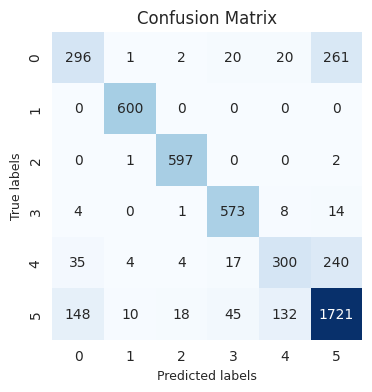

In [214]:
cm = confusion_matrix( y_val, predict )
plt.figure(figsize=( 4, 4 ))
sns.heatmap( cm, annot=True, cmap='Blues', fmt='g', cbar=False )
plt.xlabel('Predicted labels' , fontsize=9)
plt.ylabel('True labels' , fontsize=9)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

In [215]:
log_reg_pipe = Pipeline(steps = [
    ('std' , StandardScaler() ),
    ('classifier' , LogisticRegression(max_iter=1000  , C=1 , n_jobs=-1))
])



log_reg_pipe.fit( X_train, y_train )
y_pred = log_reg_pipe.predict(X_train)
accuracy = accuracy_score(y_train, y_pred )
print( "Accuracy:", accuracy )

Accuracy: 0.8690810544469081


In [187]:
print(classification_report(y_train,log_reg_pipe.predict(X_train)))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      2400
           1       1.00      1.00      1.00      2400
           2       1.00      1.00      1.00      2400
           3       1.00      1.00      1.00      2400
           4       0.87      0.80      0.83      2400
           5       0.88      0.93      0.91      8295

    accuracy                           0.92     20295
   macro avg       0.93      0.91      0.92     20295
weighted avg       0.92      0.92      0.92     20295



In [190]:
# Predict on the test data
predict = log_reg_pipe.predict(X_test)

# Create a DataFrame for submission
submission = pd.DataFrame({
    "ID": range(1, 4547),
    "total_rating": predict  # Use the predicted class labels directly
})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

* **Test Score** Accuracy is **0.6887** at C = 0.1
* **Test Score** Accuracy is **0.7688** at C = 1
* **Test Score** Accuracy is **0.5943** at C = 10

### SVM RBF

#### HPT on SVM with radial basic function

In [ ]:


# pipe = Pipeline([
#     ('scale', StandardScaler()),
#     ('clf', SVC(kernel='rbf', random_state=42)),
# ])


# param_grid = {
#     'clf__C': [0.1,1, 10,100],
#     'clf__gamma': [0.001 , 0.01, 0.1, 1 ,10 ],
# }


# cv = StratifiedKFold( n_splits=3, shuffle=True, random_state=42 )


# grid_search_svm = GridSearchCV( pipe, param_grid, cv=cv, n_jobs=-1 )
# grid_search_svm.fit( X_train, y_train )


# # Get best model and its parameters
# best_model2 = grid_search2.best_estimator_
# print("Best Parameters:", grid_search2.best_params_)


# cv_scores = cross_val_score( best_model2, X_train, y_train, cv=cv )
# print( "Cross-Validation Scores:", cv_scores )
# print( "Mean CV Accuracy:", cv_scores.mean() )



**Best Params** : **C=10, gamma=0.001** 
* **Cleared the cut off but was overfit model good score on test data got by some regulrization with  C=2**

In [216]:
svm_best_model = Pipeline( [
    ('scale', StandardScaler()) ,
    ('clf', SVC(kernel='rbf', random_state=42 ,C =  2, gamma =  0.001  ))
])

svm_best_model.fit(X_train,y_train)
y_pred = svm_best_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred )
print("Accuracy:", accuracy)

Accuracy: 0.9941364868194137


**Cross Val Score**

In [221]:
cv_scores = cross_val_score( svm_best_model, X_train, y_train, cv=cv )
print( "Cross-Validation Scores:", cv_scores )
print( "Mean CV Accuracy:", cv_scores.mean() )

Cross-Validation Scores: [0.91781227 0.91574279 0.91810791]
Mean CV Accuracy: 0.917220990391722


**Validation Score**

In [222]:
predict = svm_best_model.predict(X_val)
print(classification_report(y_val,predict))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       600
           1       1.00      1.00      1.00       600
           2       1.00      1.00      1.00       600
           3       0.99      1.00      1.00       600
           4       0.96      0.82      0.88       600
           5       0.91      0.97      0.94      2074

    accuracy                           0.95      5074
   macro avg       0.97      0.94      0.95      5074
weighted avg       0.95      0.95      0.95      5074



**Confusion Matrix**

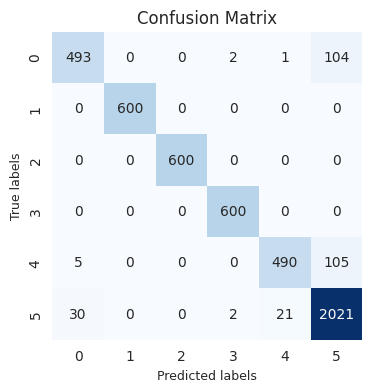

In [223]:
cm = confusion_matrix( y_val, predict )
plt.figure(figsize=( 4, 4 ) )
sns.heatmap( cm, annot=True, cmap='Blues', fmt='g', cbar=False )
# Add labels, title, and axis ticks
plt.xlabel('Predicted labels' , fontsize=9 )
plt.ylabel('True labels' , fontsize=9 )
plt.title( 'Confusion Matrix', fontsize=12 )
plt.show()

*  **SVC** with **C** = **10** was **overfit**
* ****SVC** with **C**=**2** gives **0.77716 on test set** accuracy which is good  considering with the number of around 1000 features.

### MLP Classifier

In [224]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001,
                    learning_rate='constant')

mlp_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('clf', mlp_classifier),
])


mlp_pipe.fit(X_train, y_train)



y_pred = mlp_pipe.predict(X_train)
accuracy = accuracy_score(y_train, y_pred )
print("Accuracy:", accuracy)
# train score 0.99
# validation score accuracy 0.93      
# test accuracy  0.74109



Accuracy: 0.9995072677999507


In [225]:
predict = mlp_pipe.predict(X_val)

# classification report
print(classification_report( y_val , predict ))


              precision    recall  f1-score   support

           0       0.85      0.85      0.85       600
           1       1.00      1.00      1.00       600
           2       0.99      1.00      0.99       600
           3       0.95      1.00      0.97       600
           4       0.88      0.85      0.86       600
           5       0.93      0.92      0.92      2074

    accuracy                           0.93      5074
   macro avg       0.93      0.94      0.93      5074
weighted avg       0.93      0.93      0.93      5074



**Test Score 0.7410**

### Knearest Neigbours Classifier.

**Grid Search CV on KNN**

In [226]:
param_grid = {'n_neighbors': range(2, 8)} ## number of neighbours for the KNN algorithms to try
knn = KNeighborsClassifier(n_jobs=-1)


cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
# Define the grid search cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3 )


#  the grid search
grid_search.fit(X_train,y_train)
knn_result = grid_search.cv_results_


# Print the best parameter
knn_best = grid_search.best_estimator_



In [227]:
print("Best Parameters : ", grid_search.best_params_ )
cv_scores = cross_val_score( knn_best, X_train, y_train, cv=cv )

Best Parameters :  {'n_neighbors': 3}


In [228]:
print( "Cross-Validation Scores:", cv_scores )
print( "Mean CV Accuracy:", cv_scores.mean() )

Cross-Validation Scores: [0.72416851 0.71249076 0.7127864 ]
Mean CV Accuracy: 0.7164818920916481


In [229]:
print('..........Score on Validation Set...... .\n\n')
predict = knn_best.predict(X_val)
print(classification_report(y_val,predict))

..........Score on Validation Set...... .


              precision    recall  f1-score   support

           0       0.48      0.87      0.62       600
           1       0.94      1.00      0.97       600
           2       0.96      1.00      0.98       600
           3       0.81      1.00      0.90       600
           4       0.56      0.82      0.66       600
           5       0.92      0.49      0.64      2074

    accuracy                           0.75      5074
   macro avg       0.78      0.86      0.79      5074
weighted avg       0.82      0.75      0.75      5074



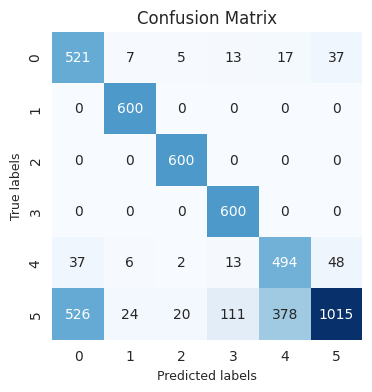

In [230]:
cm = confusion_matrix( y_val, predict )
plt.figure(figsize=( 4, 4 ))
sns.heatmap( cm, annot=True, cmap='Blues', fmt='g', cbar=False )
# Add labels, title, and axis ticks
plt.xlabel('Predicted labels' , fontsize=9 )
plt.ylabel('True labels' , fontsize=9 )
plt.title( 'Confusion Matrix', fontsize=12 )
plt.show()

**Test Score** **0.5494** not performing well.

### SVC Linear

In [21]:
from sklearn.linear_model import SGDClassifier


# Define the pipeline
pipe_sgd_hinge = Pipeline([
    ('scale', StandardScaler()),
    ('clf', SGDClassifier(loss='hinge', random_state=42)),
])


#  the parameter grid for grid search
param_grid_sgd_hinge = {
    'clf__alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization parameter
}


#  cross-validation strategy (Stratified K-Fold)
cv_sgd_hinge = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


#  grid search CV for SGDClassifier with 'hinge' loss
grid_search_sgd_hinge = GridSearchCV(pipe_sgd_hinge, param_grid_sgd_hinge, cv=cv_sgd_hinge, n_jobs=-1)
grid_search_sgd_hinge.fit(X_train, y_train)


# Get the best model and its parameters
best_model_sgd_hinge = grid_search_sgd_hinge.best_estimator_
print("Best Parameters (SGD with Hinge Loss):", grid_search_sgd_hinge.best_params_)

Best Parameters (SGD with Hinge Loss): {'clf__alpha': 0.001}


In [232]:
pd.DataFrame( grid_search_sgd_hinge.cv_results_ )

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,29.048599,0.829655,0.117539,0.025216,0.0001,{'clf__alpha': 0.0001},0.778714,0.771323,0.777088,0.775708,0.003171,3
1,27.338876,0.310018,0.117118,0.001546,0.001,{'clf__alpha': 0.001},0.792166,0.783888,0.798522,0.791525,0.005992,1
2,16.488591,0.387845,0.084689,0.000110,0.01,{'clf__alpha': 0.01},0.783592,0.767332,0.779157,0.776694,0.006863,2
3,11.901169,0.361033,0.109162,0.020516,0.1,{'clf__alpha': 0.1},0.740724,0.736290,0.752698,0.743237,0.006930,4


In [23]:
# Evaluate the best model using cross-validation
cv_scores_svm_hinge = cross_val_score(best_model_sgd_hinge, X_train, y_train, cv=cv_sgd_hinge )
print("Cross-Validation Scores (SVM with Hinge Loss):", cv_scores_svm_hinge)
print("Mean CV Accuracy (SVM with Hinge Loss):", cv_scores_svm_hinge.mean() ) 

Cross-Validation Scores (SVM with Hinge Loss): [0.79216556 0.78388766 0.7985218 ]
Mean CV Accuracy (SVM with Hinge Loss): 0.7915250061591524


In [24]:
print('..........Score on Validation Set.......\n\n')
predict = best_model_sgd_hinge.predict( X_val )
print(classification_report( y_val,predict ) )

..........Score on Validation Set.......


              precision    recall  f1-score   support

           0       0.62      0.48      0.54       600
           1       0.99      1.00      0.99       600
           2       1.00      0.98      0.99       600
           3       0.90      0.95      0.93       600
           4       0.61      0.48      0.54       600
           5       0.76      0.85      0.80      2074

    accuracy                           0.81      5074
   macro avg       0.81      0.79      0.80      5074
weighted avg       0.80      0.81      0.80      5074



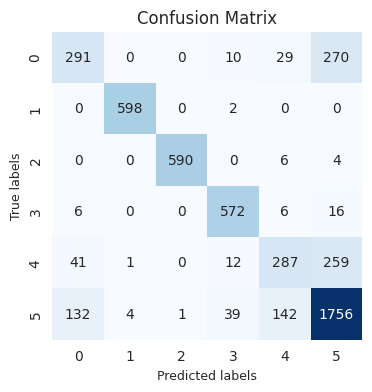

In [25]:
cm = confusion_matrix( y_val, predict )
plt.figure(figsize=( 4, 4 ) )
sns.heatmap( cm, annot=True, cmap='Blues', fmt='g', cbar=False )
#labels, title, and axis ticks
plt.xlabel('Predicted labels' , fontsize=9 )
plt.ylabel('True labels' , fontsize=9 )
plt.title( 'Confusion Matrix', fontsize=12 )
plt.show()

In [ ]:
pipe_sgd_hinge = Pipeline( [
    ('scale', StandardScaler()),
    ('clf', SGDClassifier(loss='hinge', alpha=0.001 , random_state=42)),
] )


pipe_sgd_hinge.fit(X_train,y_train)


predict = pipe_sgd_hinge.predict( X_test )


submission = pd.DataFrame( { "ID": range(1,4547) ,
                           "Rating": predict} )


submission.to_csv( 'submission.csv',index=False )

**Test Score 0.71205**

### Voting Classifier.

In [27]:



m1 = LogisticRegression(max_iter=10000 , n_jobs=-1)
m2 = SVC(kernel='rbf', random_state=42 ,C =  2, gamma =  0.001  )
m3 = XGBClassifier(objective="multi:softmax", num_class=6, random_state=111)

model = VotingClassifier(estimators=[('lr', m1), ('svc', m2), ('xgb', m3)], voting='hard')


pipe = Pipeline( [
    ('scale', StandardScaler()),
    ('clf', model),
] )


pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(max_iter=10000,
                                                                  n_jobs=-1)),
                                              ('svc',
                                               SVC(C=2, gamma=0.001,
                                                   random_state=42)),
                                              ('xgb',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             device=None,
                                                             early_stopping_rounds=None,
                                                             ena...
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_class=6,
                                                             num_parallel_tree=None, ...))]))])

In [28]:
predict = pipe.predict( X_val )
print(classification_report( y_val,predict ) )

              precision    recall  f1-score   support

           0       0.91      0.76      0.83       600
           1       0.99      1.00      1.00       600
           2       1.00      1.00      1.00       600
           3       0.98      1.00      0.99       600
           4       0.95      0.75      0.84       600
           5       0.88      0.97      0.92      2074

    accuracy                           0.93      5074
   macro avg       0.95      0.91      0.93      5074
weighted avg       0.93      0.93      0.93      5074



In [ ]:
predict = pipe.predict( X_test )
submission = pd.DataFrame( { "ID": range(1,4547) ,
                           "Rating": predict} )

submission.to_csv( 'submission.csv',index=False )                                                                                    

**Test Score 0.77540**

 ## Model Comparison

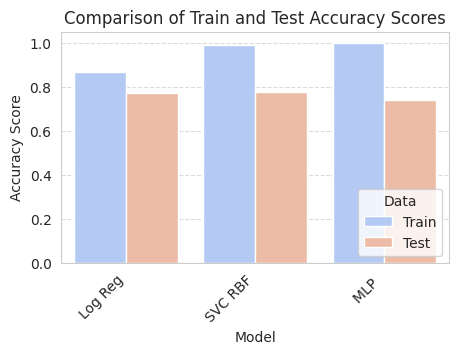

In [30]:

train_accuracy_scores = [ 0.8655 , 0.9892, 0.9993 ]
test_accuracy_scores = [ 0.7688, 0.7771, 0.7410 ]
model_names = ['Log Reg', 'SVC RBF', 'MLP ']



df = pd.DataFrame({'Model': model_names * 2,
                   'Accuracy': train_accuracy_scores + test_accuracy_scores,
                   'Data': ['Train'] * len(train_accuracy_scores) + ['Test'] * len(test_accuracy_scores)})

plt.figure(figsize=(5, 3))
sns.barplot(data=df, y='Accuracy', x='Model', hue='Data', palette='coolwarm')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Train and Test Accuracy Scores')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Data', loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Test Data Prediction

In [ ]:


svm_best_model = Pipeline( [
    ( 'scale', StandardScaler() ) ,
    ( 'clf', SVC(kernel='rbf', random_state=42 ,C =  2, gamma =  0.001  ))
] )


svm_best_model.fit(X_train , y_train)


predict = svm_best_model.predict( X_test )


submission = pd.DataFrame( { "ID": range(1,4547) ,
                   "Rating": predict} )


submission.to_csv( 'submission.csv',index=False )




* **Final Test Score 0.777**

#### AUC ROC Curve


The Area Under the ROC Curve (AUC-ROC) is another evaluation metric commonly used in binary classification tasks. ROC stands for Receiver Operating Characteristic. AUC-ROC quantifies the performance of a classification model by measuring the area under the curve plotted between the True Positive Rate (TPR) and the False Positive Rate (FPR) at various threshold settings.

In [ ]:


from sklearn.metrics import roc_curve
from sklearn.metrics import auc


# Binarize the labels
y_val_binarized = label_binarize(y_val, classes=np.arange(6))


# the OneVsRestClassifier
classifier = OneVsRestClassifier(svm_best_model)
classifier.fit(X_train, y_train)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_val_binarized[:, i], classifier.decision_function(X_val)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    
# Plot ROC curves
plt.figure()
colors = ['blue', 'red', 'green', 'yellow', 'orange', 'purple']

for i, color in zip(range(6), colors) : 
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve class %d (area = %0.2f)' % (i, roc_auc[i]))
    
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-class SVM')
plt.legend(loc="lower right")
plt.show()



#### PR Curve


A Precision-Recall (PR) curve is a graphical representation used in binary classification tasks, particularly when dealing with imbalanced datasets. It plots the trade-off between precision and recall for different threshold values used in making predictions.

In [ ]:
# OneVsRestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
classifier = OneVsRestClassifier(svm_best_model)
classifier.fit(X_train, y_train)
#  precision-recall curve and average precision for each class


precision = dict()
recall = dict()
average_precision = dict()


for i in range(6):
    precision[i], recall[i], _ = precision_recall_curve(y_val_binarized[:, i], classifier.decision_function(X_val)[:, i])
    average_precision[i] = average_precision_score(y_val_binarized[:, i], classifier.decision_function(X_val)[:, i])
# Plot Precision-Recall curves
plt.figure()


colors = ['blue', 'red', 'green', 'yellow', 'orange', 'purple']
for i, color in zip(range(7), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label='PR curve class %d (AP = %0.2f)' % (i, average_precision[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi-class SVM')
plt.legend(loc="best")
plt.show()